In [1]:
import pandas as pd
import os,sys,glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Mean_Weather_Data_Final.csv')
df.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
df.drop(columns='a',inplace = True)
df.head()


,ID,Year,Month,Mean_Tmax,Mean_Tmin,Mean_Prcp,Name,Lat,Lon
0,USC00042863,2000,1,71.551724,44.482759,0.000000,Escondido,33.1211,-117.09
1,USC00042863,2000,2,70.136364,45.954545,0.000000,Escondido,33.1211,-117.09
2,USC00042863,2000,3,70.000000,45.806452,0.032258,Escondido,33.1211,-117.09
3,USC00042863,2000,4,76.482759,51.241379,0.000000,Escondido,33.1211,-117.09
4,USC00042863,2000,5,80.928571,54.714286,0.000000,Escondido,33.1211,-117.09


In [3]:
Name = df['Name'].unique()
Name

array(['Escondido', 'Natchitoches', 'Belvidere', 'NewBrunswick',
       'Portland', 'Aiken', 'Denver', 'Flagstaff', 'Yuma', 'Riverside',
       'Asheville', 'Macon', 'Augusta', 'Savannah', 'Bluefield',
       'Huntington', 'Beckley', 'CollegeStation', 'DallasFortWorth',
       'LakeCharles', 'Jackson', 'ColumbiaMO', 'KansasCity', 'Jonesboro',
       'Jefferson', 'Stillwater', 'Cleveland', 'Orlando', 'Gainesville',
       'FortMyers', 'KeyWest', 'Miami', 'Tampa', 'WestPalmBeach',
       'SanAntonio', 'Galveston', 'CorpusChristi', 'Houston', 'Raleigh',
       'Lynchburg', 'Morgantown', 'NorfolkVA', 'Philadelphia', 'Richmond',
       'WashingtonDC', 'Wilmington', 'Hattiesburg', 'Mobile', 'Meridian',
       'Charleston', 'Athens', 'Atlanta', 'Birmingham', 'Charlotte',
       'Chattanooga', 'ColumbiaSC', 'GreenvilleSpartanburg',
       'Jacksonville', 'Memphis', 'Montgomery', 'MuscleShoals',
       'Nashville', 'Pensacola', 'Monroe', 'Shreveport', 'Austin',
       'Abilene', 'LittleRock', '

In [82]:
city_pop=[]
#city= ['billings',,''santa fe',
           #'dallas','new orleans',]
city = ['Denver', 'Miami', 'Houston', 'Raleigh', 'Atlanta', 'Nashville','LosAngeles',
       'Burlington', 'Phoenix', 'Sacramento', 'Seattle', 'Chicago','NewYork','KansasCity','SiouxFalls',]

for item in city:
    #item = item.title()
    city_pop.append(item)
city_pop

['Denver',
 'Miami',
 'Houston',
 'Raleigh',
 'Atlanta',
 'Nashville',
 'LosAngeles',
 'Burlington',
 'Phoenix',
 'Sacramento',
 'Seattle',
 'Chicago',
 'NewYork',
 'KansasCity',
 'SiouxFalls']

In [83]:
df_city=df.loc[df['Name'].isin(city_pop)]
df_city.head()
df_city['Name'].unique()

array(['Denver', 'KansasCity', 'Miami', 'Houston', 'Raleigh', 'Atlanta',
       'Nashville', 'Burlington', 'SiouxFalls', 'Phoenix', 'Sacramento',
       'Seattle', 'LosAngeles', 'NewYork', 'Chicago'], dtype=object)

In [31]:
#df_city.to_csv(r'Weather by pop cities 2000-2015.csv')

In [84]:
q1=[1,2,3]#spring
q2=[4,5,6]#summer
q3=[7,8,9]#fall
q4=[10,11,12]#winter
df_city_q1 = df_city.loc[df['Month'].isin(q1)]
df_city_q2 = df_city.loc[df['Month'].isin(q2)]
df_city_q3 = df_city.loc[df['Month'].isin(q3)]
df_city_q4 = df_city.loc[df['Month'].isin(q4)]
df_city_q1.head()

,ID,Year,Month,Mean_Tmax,Mean_Tmin,Mean_Prcp,Name,Lat,Lon
1083,USW00003017,2000,1,46.290323,19.677419,0.0,Denver,39.8328,-104.6575
1084,USW00003017,2000,2,53.551724,24.724138,0.0,Denver,39.8328,-104.6575
1085,USW00003017,2000,3,53.451613,27.322581,0.0,Denver,39.8328,-104.6575
1095,USW00003017,2001,1,41.870968,18.129032,0.0,Denver,39.8328,-104.6575
1096,USW00003017,2001,2,39.357143,17.178571,0.0,Denver,39.8328,-104.6575


In [119]:
#df_city_q1_mean= pd.DataFrame(df_city_q1.groupby(['Name','Year','Lat','Lon'])['Mean_Tmax','Mean_Tmin','Mean_Prcp'].mean())
#df_city_q1_mean.reset_index()
#df_city_q1_mean.head()


df_city_q1_mean= pd.DataFrame(df_city_q1.groupby(['Name','Year','Lat','Lon']).
                      agg(Mean_Tmax=pd.NamedAgg('Mean_Tmax','mean'),
                          Mean_Tmin=pd.NamedAgg('Mean_Tmin','mean'),
                          Mean_Prcp=pd.NamedAgg('Mean_Prcp','mean'))).reset_index()
df_city_q1_mean.head()



AttributeError: module 'pandas' has no attribute 'NamedAgg'

In [114]:
plot_df = df_city_q1_mean.drop(columns=['Lat','Lon'])


KeyError: "['Lat' 'Lon'] not found in axis"

ValueError: x and y must have same first dimension, but have shapes (15,) and (240,)

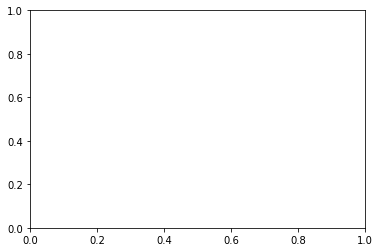

In [112]:
#world_avg, = plt.plot(years, average_unemployment, color="blue", label="World Average" )

# Plot the unemployment values for a single country
#country_one, = plt.plot(years, combined_unemployed_data.loc['USA',["2010","2011","2012","2013","2014"]], 
                        #olor="green",label=combined_unemployed_data.loc['USA',"Country Name"])

# Create a legend for our chart
#plt.legend(handles=[world_avg, country_one], loc="best")

# Show the chart
#plt.show()
years = np.arange(2000, 2015, 1).tolist()
#ears
plt.plot(years, df_city_q1_mean['Mean_Tmax'],color="blue", label="Max_Temp_Q1" )
#plt.show()